## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio. 

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*. 

Question *7* is about data ethics issue.

In [154]:
your_name = "MOHD AMAAN"
your_student_id = "47943734"

In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [157]:
# Reading the data using read_csv method

cars_df = pd.read_csv('car_sells_clean_data.csv')


In [158]:
# Printing the total number of records in the dataset
print("The total number of records in the dataset are : ", len(cars_df))

The total number of records in the dataset are :  3657


### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [160]:
#Exploring the dataset

print("Printing the first five rows of the dataset :")
cars_df.head()

Printing the first five rows of the dataset :


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [161]:
#Printing the information of the dataset using .info method:

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3657 non-null   int64  
 3   km_driven      3657 non-null   int64  
 4   fuel           3657 non-null   object 
 5   seller_type    3657 non-null   object 
 6   transmission   3657 non-null   object 
 7   owner          3657 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 228.7+ KB


In [162]:
# Exploring the statistics of the numerical features using describe method
cars_df.describe()

,year,selling_price,km_driven
count,3657.000000,3.657000e+03,3657.000000
mean,2013.123599,4.945088e+05,66560.660924
std,4.119128,5.579230e+05,47007.819292
min,1995.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [163]:
#Checking if there are any missing values in the dataset
cars_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [164]:
#Checking total number of columns in the dataset

print("Number of columns in the dataset : ",len(cars_df.columns))


Number of columns in the dataset :  8


In [165]:
# Exploring the datatypes of each columns : we use dtypes method

print("The datatypes of the columns are :")
cars_df.dtypes

The datatypes of the columns are :


name              object
year             float64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
dtype: object

In [166]:
# Converting categorical features into numerical values using Ordinal Encoding
# importing OrdinalEncoder from sklearn
from sklearn.preprocessing import OrdinalEncoder

ordinalEncoder = OrdinalEncoder()

# instantiate OrdinalEncoder and then using fit_transform to transform data

cars_df['seller_type_encoded'] = ordinalEncoder.fit_transform(cars_df[['seller_type']])
cars_df['owner_encoded'] = ordinalEncoder.fit_transform(cars_df[['owner']])
cars_df['fuel_encoded'] = ordinalEncoder.fit_transform(cars_df[['fuel']])

#printing the dataset after converting the features

cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seller_type_encoded,owner_encoded,fuel_encoded
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner,1.0,0.0,1.0
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner,1.0,0.0,1.0
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner,1.0,0.0,0.0
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner,1.0,0.0,1.0
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner,1.0,1.0,0.0


In [167]:
#Creating a DataFrame that stores all the numerical columns for which we need to find the correlation :

cars_df_num_features = cars_df[['year','seller_type_encoded','owner_encoded','fuel_encoded','km_driven','selling_price']].copy()

#Displaying the first five rows:

cars_df_num_features.head()

,year,seller_type_encoded,owner_encoded,fuel_encoded,km_driven,selling_price
0,2007.0,1.0,0.0,1.0,70000,60000
1,2007.0,1.0,0.0,1.0,50000,135000
2,2012.0,1.0,0.0,0.0,100000,600000
3,2017.0,1.0,0.0,1.0,46000,250000
4,2014.0,1.0,1.0,0.0,141000,450000


In [168]:
#Now finding the correlations between Fuel , Year, Km_Driven, Seller_Type, Owner_Type and target variable - Selling_Price

# Correlation between Fuel type and Selling price

fuel_sp_corr = cars_df_num_features['fuel_encoded'].corr(cars_df_num_features['selling_price'])

print("The correlation between fuel type and selling price is : ",fuel_sp_corr)

The correlation between fuel type and selling price is :  -0.27762704341734934


In [169]:
# Correlation betweeen year and selling price

year_sp_corr = cars_df_num_features['year'].corr(cars_df_num_features['selling_price'])

print("The correlation between year and selling price is : ",year_sp_corr)

The correlation between year and selling price is :  0.41110276220633124


In [170]:
# Correlation between km_driven and selling price

km_sp_corr = cars_df_num_features['km_driven'].corr(cars_df_num_features['selling_price'])

print("The correlation between km_driven and selling price is : ",km_sp_corr)

The correlation between km_driven and selling price is :  -0.1772027798572389


In [171]:
# Correlation between seller type and selling price

sellertype_sp_corr = cars_df_num_features['seller_type_encoded'].corr(cars_df_num_features['selling_price'])

print("The correlation between seller_type and selling price is : ",sellertype_sp_corr)

The correlation between seller_type and selling price is :  -0.20863704840276923


In [172]:
# Correlation between owner type and selling price

ownertype_sp_corr = cars_df_num_features['owner_encoded'].corr(cars_df_num_features['selling_price'])

print("The correlation between owner_type and selling price is : ",ownertype_sp_corr)

The correlation between owner_type and selling price is :  -0.20552358731122453


In [173]:
# The correlation matrix between Fuel , Year, Km_Driven, Seller_Type, Owner_Type and target variable - Selling_Price

cars_df_num_features.corr()

,year,seller_type_encoded,owner_encoded,fuel_encoded,km_driven,selling_price
year,1.000000,-0.139135,-0.433406,-0.118542,-0.404058,0.411103
seller_type_encoded,-0.139135,1.000000,0.239288,0.036755,0.147376,-0.208637
owner_encoded,-0.433406,0.239288,1.000000,-0.017217,0.306730,-0.205524
fuel_encoded,-0.118542,0.036755,-0.017217,1.000000,-0.297764,-0.277627
km_driven,-0.404058,0.147376,0.306730,-0.297764,1.000000,-0.177203
selling_price,0.411103,-0.208637,-0.205524,-0.277627,-0.177203,1.000000


<Axes: >

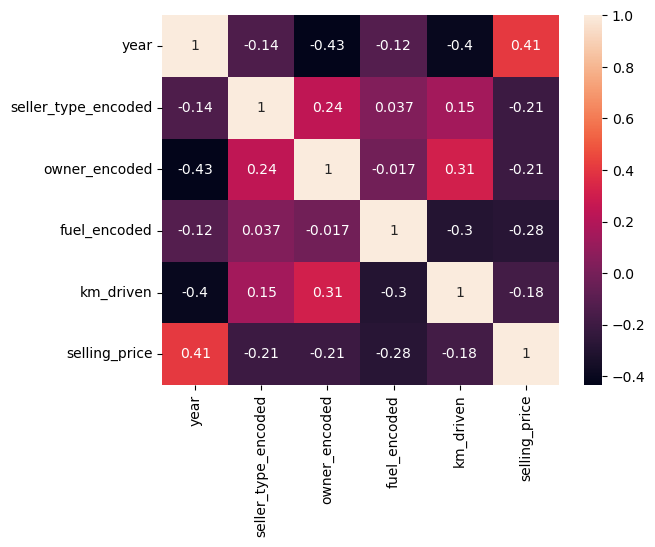

In [174]:
#Displaying the heat map for the correlation obtained
sns.heatmap(cars_df_num_features.corr(), annot=True)


### Explanations :

The correlation obtained from above matrix are given below:

* The correlation between fuel type and selling price is : -0.
27762704341734934
* ⁠The correlation between year and selling price is :  0.
41110276220633124
* The correlation between km_driven and selling price is : -0.
1772027798572389
* The correlation between seller_type and selling price is : -0.
20863704840276923
* The correlation between owner_type and selling price is : -0.
20552358731122453

The correlation between features is an essential factor which impacts the preciseness of the final selling price predictions rendered during the training process of a regression model.





From the correlation obtained from above matrix, we get the following conclusions:

* The features that have a substantial contribute with the selling price are the fuel type and year, demonstrating that they have an important impact on estimating the car's selling price.
* The least connected features like seller type, owner type, and km driven belong to those the fact that refrain from providing as much direct information with regard to the car’s selling price.


In Depth Analysis on the Correlation:
* ⁠The most accurate prediction outcomes emanate from features that are associated with a high either a positive or negative correlation to the selling price; higher positive correlations are directly correlated with higher prices, while higher negative correlations are inversely correlated with lower prices.
* ⁠On the other hand, strongly correlated features are more useful for accurate forecasts than features with a weak or no association with the selling price, which ultimately results in poor prediction accuracy.


The impacts which are possibly seen are discussed below:

* In addition to their substantial positive or negative correlations, the highly correlated features will have an important influence on the precision of the predictions are. Since they contribute insightful information about pricing trends, incorporating them to while training a model ought to improve its performance.

* Having low-correlation features may add noise to the model, diminishing the precision of the predictions. Despite substantially enhancing the ability to predict, they could make the model far more complicated.

### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [181]:
# Spliting the dataset into train and test data with case1 - 10% train 90% test
train_case1 , test_case1 = train_test_split(cars_df, test_size= 0.9, random_state= 42)

print("The shape of training set in case 1 : "+ str(train_case1.shape) + " and testing set in case 1 is "+ str(test_case1.shape))


The shape of training set in case 1 : (365, 11) and testing set in case 1 is (3292, 11)


In [182]:
# Spliting the dataset into train and test data with case1 - 90% train 10% test
train_case2 , test_case2 = train_test_split(cars_df, test_size= 0.1, random_state= 42)

print("The shape of training set in case 2 : "+ str(train_case2.shape) + " and testing set in case 2 is "+ str(test_case2.shape))


The shape of training set in case 2 : (3291, 11) and testing set in case 2 is (366, 11)


### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [184]:
# Model- A
# Building Model A using the training/testing data in case 1 with two most correlated input features - fuel , year

X_a_train_case1= train_case1[['fuel_encoded','year']]
y_a_train_case1 = train_case1['selling_price']

X_a_test_case1= test_case1[['fuel_encoded','year']]
y_a_test_case1 = test_case1['selling_price']

# Implementing the linear Regressor model and training with the train dataset
model_a = linear_model.LinearRegression()
model_a.fit(X_a_train_case1,y_a_train_case1)

# Predicting the values on the test data using predict method
predicted_A= model_a.predict(X_a_test_case1)

#Evaluating the performance of Model - A using metrics - MSE , RMSE , R^2
mse_a = mean_squared_error(y_a_test_case1, predicted_A)
r2_a=r2_score(y_a_test_case1, predicted_A)

#Displaying the metrics for Model - A
print("MSE for model-a:", mean_squared_error(y_a_test_case1, predicted_A))
print("Root MSE for model-a", np.sqrt(mse_a))
print("R^2 for model-a:", r2_score(y_a_test_case1, predicted_A))

MSE for model-a: 240873725575.0951
Root MSE for model-a 490788.8808592704
R^2 for model-a: 0.20436190784599761


In [185]:
# Model- B
# Building the Model - B using the training/testing data in case 1 with two least correlated input features - seller_type , owner type
X_b_train_case1= train_case1[['seller_type_encoded','owner_encoded']]
y_b_train_case1 = train_case1['selling_price']

X_b_test_case1= test_case1[['seller_type_encoded','owner_encoded']]
y_b_test_case1 = test_case1['selling_price']

# Implementing the linear Regressor model and training with the train dataset
model_b = linear_model.LinearRegression()
model_b.fit(X_b_train_case1,y_b_train_case1)

#Predicting the values on the test data using predict method 
predicted_B= model_b.predict(X_b_test_case1)

#Evaluating the performance of Model - B using metrics - MSE , RMSE , R^2
r2_b =r2_score(y_b_test_case1, predicted_B)
mse_b = mean_squared_error(y_b_test_case1, predicted_B)

#Displaying the metrics for Model - B
print("MSE for model-b:", mean_squared_error(y_b_test_case1, predicted_B))
print("Root MSE for model-b", np.sqrt(mse_b))
print("R^2 for model-b:", r2_score(y_b_test_case1, predicted_B))

MSE for model-b: 285293189672.4325
Root MSE for model-b 534128.4393031629
R^2 for model-b: 0.05763848425743967


In [186]:
# Model- C
# Building the Model- C using the training/testing data in case 2 with two most correlated input features fuel and year
X_c_train_case2= train_case2[['fuel_encoded','year']]
y_c_train_case2 = train_case2['selling_price']

X_c_test_case2= test_case2[['fuel_encoded','year']]
y_c_test_case2 = test_case2['selling_price']

# Implementing the linear Regressor model and training with the train dataset
model_c = linear_model.LinearRegression()
model_c.fit(X_c_train_case2,y_c_train_case2)

# Predicting the values on the test data using predict method 
predicted_C= model_c.predict(X_c_test_case2)

# Evaluating the performance of Model - C using metrics - MSE , RMSE , R^2
mse_c = mean_squared_error(y_c_test_case2, predicted_C)
r2_c= r2_score(y_c_test_case2, predicted_C)

#Displaying the metrics for Model - C
print("MSE for model-c:", mean_squared_error(y_c_test_case2, predicted_C))
print("Root MSE for model-c", np.sqrt(mse_c))
print("R^2 for model-c:", r2_score(y_c_test_case2, predicted_C))

MSE for model-c: 141350876932.57782
Root MSE for model-c 375966.59018133226
R^2 for model-c: 0.3197367717290559


In [187]:
# Model- D
#Building Model - D using the training/testing data in case 2 with two least correlated input features seller type and owner type
X_d_train_case2= train_case2[['seller_type_encoded','owner_encoded']]
y_d_train_case2 = train_case2['selling_price']

X_d_test_case2= test_case2[['seller_type_encoded','owner_encoded']]
y_d_test_case2 = test_case2['selling_price']

# Implementing the linear Regressor model and training with the train dataset
model_d = linear_model.LinearRegression()
model_d.fit(X_d_train_case2,y_d_train_case2)

# Predicting the values on the test data using predict method 
predicted_D= model_d.predict(X_d_test_case2)

# Evaluating the performance of Model - D using metrics - MSE , RMSE , R^2
r2_d=r2_score(y_d_test_case2, predicted_D)
mse_d = mean_squared_error(y_d_test_case2, predicted_D)

#Displaying the metrics for Model - D
print("MSE for model-d:", mean_squared_error(y_d_test_case2, predicted_D))
print("Root MSE for model-d", np.sqrt(mse_b))
print("R^2 for model-d:", r2_score(y_d_test_case2, predicted_D))

MSE for model-d: 199442370973.7956
Root MSE for model-d 534128.4393031629
R^2 for model-d: 0.04016647029816811


### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [189]:
mse_a = mean_squared_error(y_a_test_case1, predicted_A)
print("MSE for Model-A:", mean_squared_error(y_a_test_case1, predicted_A))
print("Root MSE for Model-A", np.sqrt(mse_a))

print("\n")
mse_b = mean_squared_error(y_b_test_case1, predicted_B)
print("MSE for Model-B:", mean_squared_error(y_b_test_case1, predicted_B))
print("Root MSE for Model-B", np.sqrt(mse_b))

print("\n")
mse_c = mean_squared_error(y_c_test_case2, predicted_C)
print("MSE for Model-C:", mean_squared_error(y_c_test_case2, predicted_C))
print("Root MSE for Model-C", np.sqrt(mse_c))

print("\n")
mse_d = mean_squared_error(y_d_test_case2, predicted_D)
print("MSE for Model-D:", mean_squared_error(y_d_test_case2, predicted_D))
print("Root MSE for Model-D", np.sqrt(mse_b))

MSE for Model-A: 240873725575.0951
Root MSE for Model-A 490788.8808592704


MSE for Model-B: 285293189672.4325
Root MSE for Model-B 534128.4393031629


MSE for Model-C: 141350876932.57782
Root MSE for Model-C 375966.59018133226


MSE for Model-D: 199442370973.7956
Root MSE for Model-D 534128.4393031629


### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [191]:
models_of_4 = ['Model_A','Model_B','Model_C','Model_D']
# Storing the values of mse for each model in a list
mse = [mse_a,mse_b,mse_c,mse_d]


In [192]:
# Storing the values of rmse for each model in a list
root_mse = [np.sqrt(mse_a),np.sqrt(mse_b),np.sqrt(mse_c),np.sqrt(mse_d)]


(0.0, 342351827606.919)

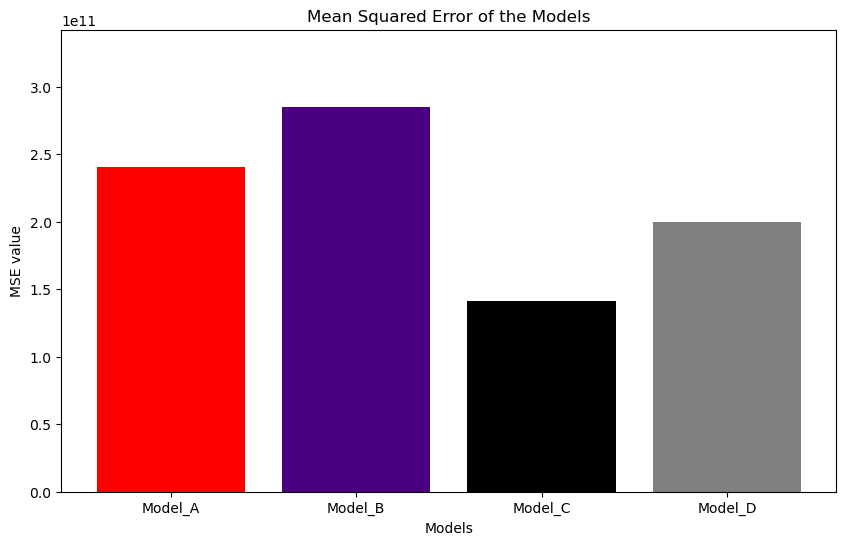

In [193]:
# Ploting the bar graph to display the mse of each model using .bar method from matplotlib
plt.figure(figsize=(10, 6))
plt.bar(models_of_4, mse, color= ['red', 'indigo', 'black', 'grey'])
# Setting title 
plt.title('Mean Squared Error of the Models')
# Setting x - label
plt.xlabel('Models')
# Setting y- label
plt.ylabel('MSE value')
# Setting scale on y axis using y limit
plt.ylim(0, max(mse) * 1.2) 

(0.0, 587541.2832334792)

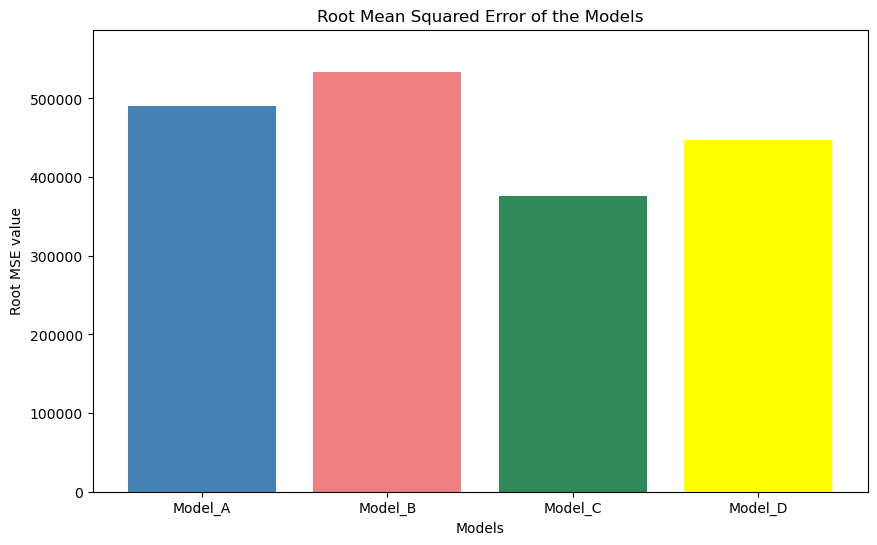

In [194]:
# Ploting the bar graph to display the mse of each model using .bar method from matplotlib
plt.figure(figsize=(10, 6))
plt.bar(models_of_4, root_mse, color= ['steelblue', 'lightcoral', 'seagreen', 'yellow'])
# Setting title 
plt.title('Root Mean Squared Error of the Models')
# Setting x - label
plt.xlabel('Models')
# Setting y- label
plt.ylabel('Root MSE value')
# Setting scale on y axis using y limit
plt.ylim(0, max(root_mse) * 1.1)


### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


Fairness and representation bias are two possible ethical issues with the infographic on the medal distribution from the 2008 Olympics.The medal distribution from the 2008 Olympics is shown in the image above, which is arranged by both gold and total medals. Table 1 mostly highlights achievements of larger nations, such as China and the United States, which may obscure those of smaller nations. This could be interpreted as teaching people that large nations are infallible while ignoring the efforts made by athletes from smaller nations. Table 2 primarily highlights the gold medals that each country has won. This could be interpreted as undervaluing the athletes' achievements in winning the silver and bronze medals. This demonstrates that the athletes who took home silver or bronze were treated unfairly.